In [73]:
import pandas as pd
df = pd.read_csv(r'C:/Users/mmich/Documents/Iteso-ML/iteso-ML-class/data/raw/exam1_data.csv')
display(df)
X = df["x"]
y = df["y"]

print(X)



,x,y
0,34.287927,-5.213964
1,27.535428,7.443368
2,44.670670,-68.283858
3,50.392401,-22.754375
4,13.333478,-3.684400
...,...,...
295,30.812648,1.565797
296,17.781594,89.738593
297,12.482553,-15.714173
298,33.901522,-42.100519


0      34.287927
1      27.535428
2      44.670670
3      50.392401
4      13.333478
         ...    
295    30.812648
296    17.781594
297    12.482553
298    33.901522
299    13.197644
Name: x, Length: 300, dtype: float64


(300, 1)
(300, 1)


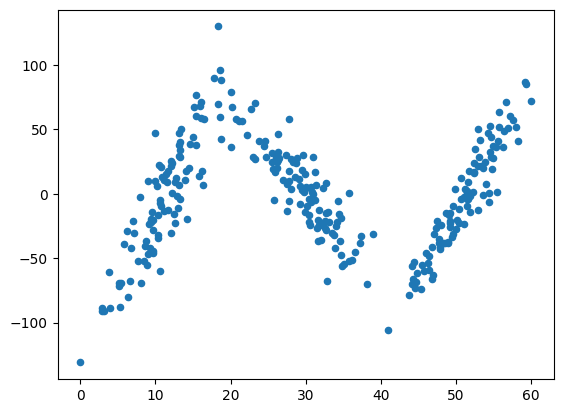

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X,y,s=20)

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

print(X.shape)
print(y.shape)


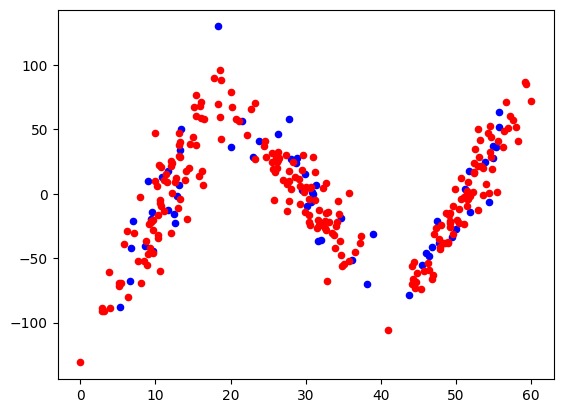

In [75]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
plt.scatter(X_test,y_test,c="b",s=20)
plt.scatter(X_train,y_train,c="r",s = 20)


plt.show()

Training: 0.810819271127622
Testing: 0.7551640958224642


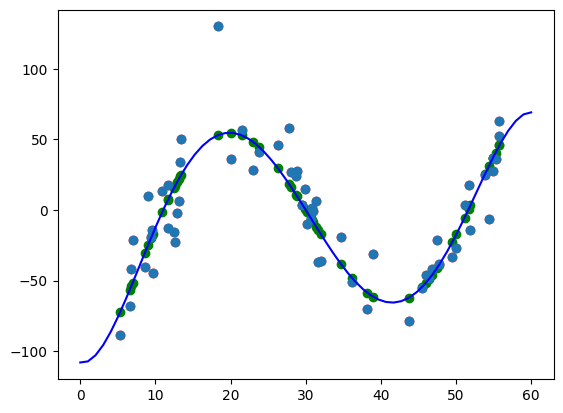

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


#Incrementado polynimial feature a 5 incrementa presición tanto en testing como en training
poly = PolynomialFeatures(5)

X_poly = poly.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_poly,y_train)
y_predict_test = reg.predict(X_poly)


#Visualización de la función como recta
X_plot = np.linspace(0,60,60).reshape(-1,1)
X_plot_poly = poly.transform(X_plot)
y_plot = reg.predict(X_plot_poly)

X_test_poly = poly.transform(X_test)
y_predict_train = reg.predict(X_test_poly)


print("Training:",r2_score(y_train,y_predict_test))
print("Testing:",r2_score(y_test,y_predict_train))

plt.scatter(X_test,y_test,c="r")
plt.scatter(X_test,y_predict_train,c="g")
plt.scatter(X_test,y_test)
plt.plot(X_plot, y_plot, "b")
plt.show()
